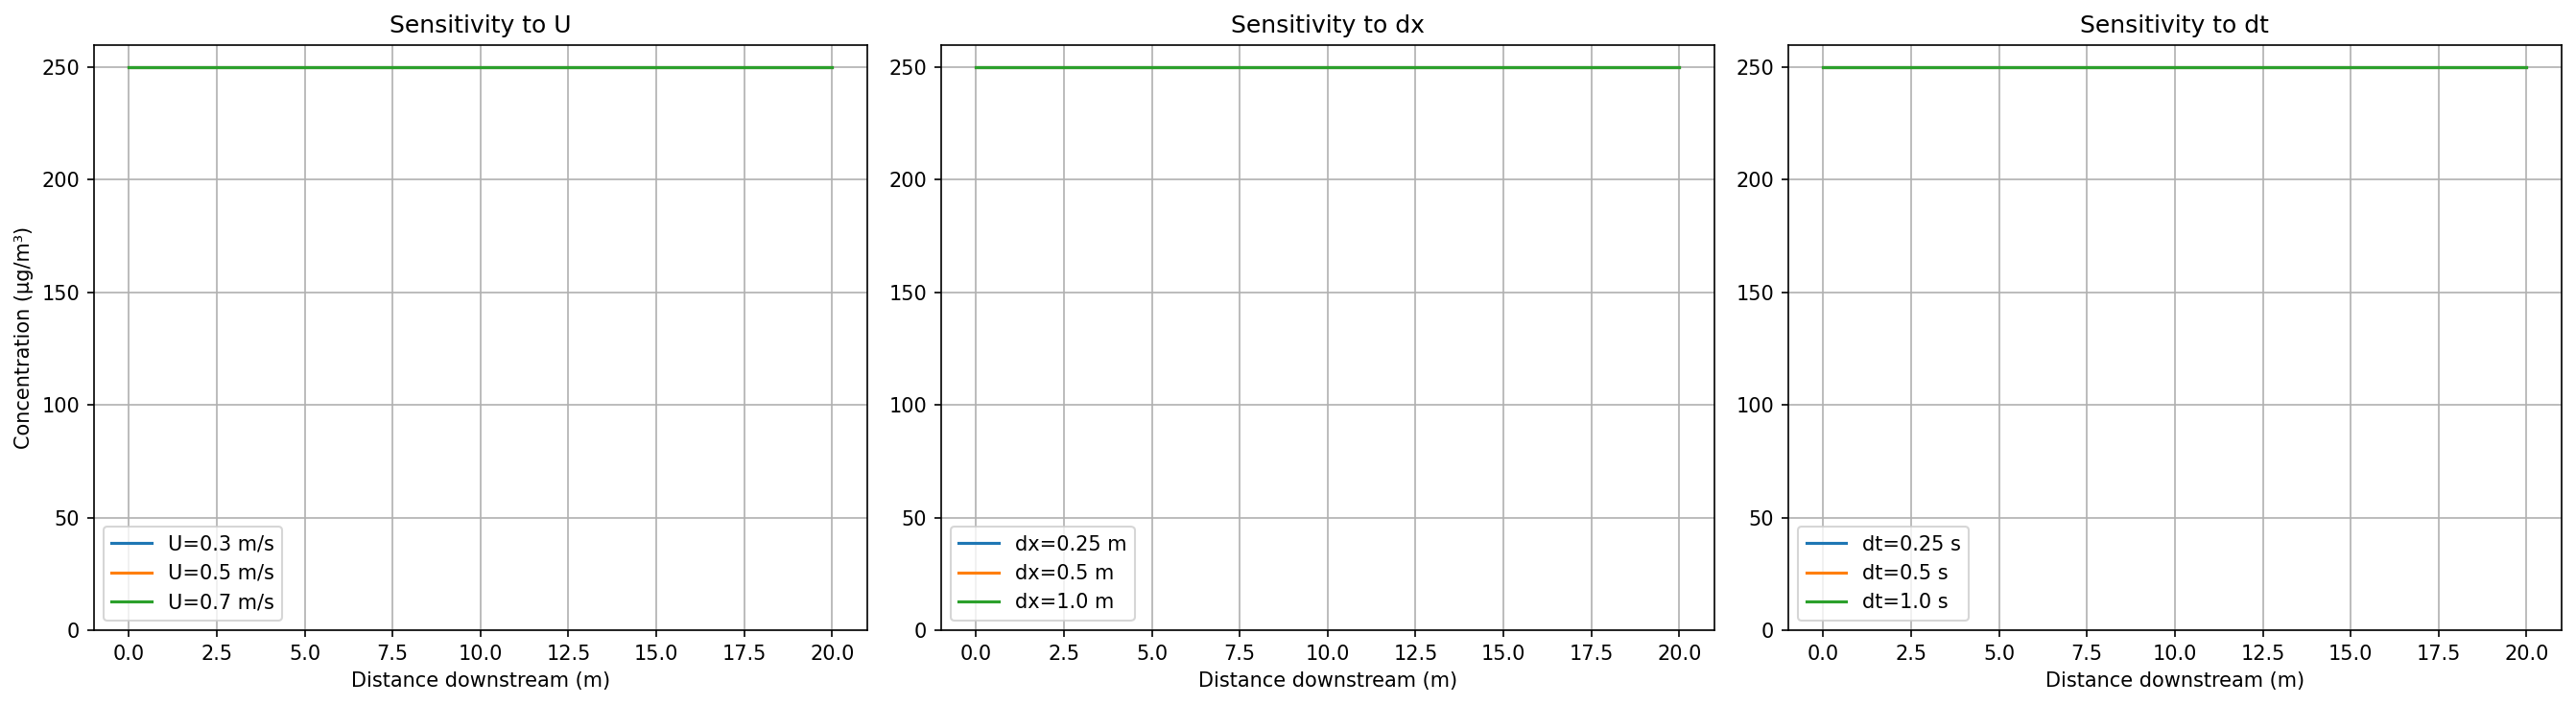

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib

# Function to run the model
def concovertime(L, T, U, Nx, Nt, dx, dt, decay=0):
    x = np.linspace(0, L, Nx)
    theta_new = np.zeros(Nx)
    theta_old = np.zeros(Nx)

    A = np.zeros(Nx)
    B = np.zeros(Nx)
    F = np.zeros(Nx)

    history = np.zeros((Nt, Nx))
    history[0, 0] = 250.0  # upstream boundary

    u = np.full(Nx, U)

    for j in range(1, Nt):
        theta_new[:] = 0.0
        theta_new[0] = 250.0 * np.exp(-decay * j * dt)  # upstream boundary

        for i in range(Nx):
            A[i] = (1.0 / dt) + (u[i] / dx)
            B[i] = -u[i] / dx

        for i in range(Nx-1):
            F[i] = (1/dt) * theta_old[i]

        for i in range(1, Nx):
            theta_new[i] = (1/A[i-1]) * (F[i-1] - B[i-1]*theta_new[i-1])

        history[j, :] = theta_new.copy()
        theta_old[:] = theta_new[:]

    return x, history

# Sensitivity test

L = 20.0
T = 60.0
U_base = 0.5
dx_base = 0.5
dt_base = 0.5
Nx_base = int(L/dx_base)+1
Nt_base = int(T/dt_base)+1

# Variations
U_values = [0.3, 0.5, 0.7]
dx_values = [0.25, 0.5, 1.0]
dt_values = [0.25, 0.5, 1.0]

time_index = -1  # final time step

fig, axes = plt.subplots(1,3, figsize=(18,5))

# Sensitivity to U
for U in U_values:
    x, history = concovertime(L, T, U, Nx_base, Nt_base, dx_base, dt_base)
    axes[0].plot(x, history[time_index,:], label=f'U={U} m/s')
axes[0].set_title("Sensitivity to U")
axes[0].set_xlabel("Distance downstream (m)")
axes[0].set_ylabel("Concentration (µg/m³)")
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylim(0,260)

# Sensitivity to dx
for dx in dx_values:
    Nx = int(L/dx)+1
    x, history = concovertime(L, T, U_base, Nx, Nt_base, dx, dt_base)
    axes[1].plot(x, history[time_index,:], label=f'dx={dx} m')
axes[1].set_title("Sensitivity to dx")
axes[1].set_xlabel("Distance downstream (m)")
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(0,260)

# Sensitivity to dt
for dt in dt_values:
    Nt = int(T/dt)+1
    x, history = concovertime(L, T, U_base, Nx_base, Nt, dx_base, dt)
    axes[2].plot(x, history[time_index,:], label=f'dt={dt} s')
axes[2].set_title("Sensitivity to dt")
axes[2].set_xlabel("Distance downstream (m)")
axes[2].legend()
axes[2].grid(True)
axes[2].set_ylim(0,260)

plt.tight_layout()
plt.show()
